# Работа 5.1
## Изучение коэффициэнта ослабления потока $\gamma$-лучей  в веществе и определние их энергии 
**Цель работы:** Измерить с помощью сцинтилляционного счетчика линейные коэффициенты
ослабления потока $\gamma$−лучей в свинце, железе и алюминии; определить по их величине энергию
$\gamma$−квантов.
<br>
**Полный линейный коэффициент $\mu$ ослабления пучка $\gamma$−квантов при прохождении:**
$$ \mu = \frac{1}{l} \ln{\frac{N_0}{N}} $$
**Экспериментальная установка:**
<img src="./img1.png"/>

In [111]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import seaborn as sns
from scipy.optimize import curve_fit
from IPython.display import display

In [135]:
plt.rcParams['figure.figsize'] = 15,9
plt.rcParams['axes.grid'] = True
pd.set_option('display.max_columns', None)
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
sns.set(style="darkgrid", palette="bright")
plt.rc('legend', fontsize= 'large')
def linear(coeffs, x):
    return coeffs[0] * x + coeffs[1]
def loss(coeffs, x, y):
    return sum((linear(coeffs, x_i) - y_i)**2 for x_i, y_i in zip(x, y))


In [112]:
N0 = 110598
bg = (289 + 258) / 2 
Pb = [[61924,36580,20488,12397,7792,4805,2935], [61634,36763,20595,12123,7770,4815,2931]]
dPb = 0.5
Fe =[[62195,35182,20273,12108,6974,4083,2411,1554,1004], [62174,35192,20351,11701,6898,4000,2515,1507,998]]
dFe = 1
Al = [[73022,47896,32305,21385,14586,9853],[73479,47599,32365,21374,12596,9849]]
dAl = 2
Wd = [[109570,106778,103704,102119,100447],[109822,106833,104260,102322,100416]]
dWd = 2
print('N_0 = {}'.format(N0))

N_0 = 110598


In [86]:
def f(x, a, b):
    return a * x + b

In [128]:
def plot (N, d, name):
    print(f'{name}, d = {d}, N:')
    data = np.array(N)
    t = ((data[0] + data[1]) / 2 - bg)
    logdata = -np.log(t / N0)
    x=d * np.array(range(1, len(data[0])+1))
    table = pd.DataFrame.from_dict({'len cm': x,
                                    f'N{1}': data[0],
                                 f'N{2}': data[1]
                                   })
    display(table.transpose())
    dx = 500 / t / x
    dy = 0.01 / d
    coefs, pcov = curve_fit(f, x, logdata)
    if name == 'Wood':
        plt.plot(x, [linear(coefs, x_i) for x_i in x], 
             label='{} $\\mu$ = {:.2f}'.format(name, coefs[0]))
    else:
        plt.plot(x, [linear(coefs, x_i) for x_i in x], 
             label='{} $\\mu$ = {:.2f} $\\pm${:.2f}'.format(name, coefs[0], (pcov[0][0]**2 + max(dx+dy)**2)**(1./2) ))
    plt.errorbar(x, logdata, xerr=dx, yerr=dy, fmt='x', color='w', ecolor='magenta', barsabove=True)
    return coefs[0]

Pb, d = 0.5, N:


,0,1,2,3,4,5,6
len cm,0.5,1.0,1.5,2.0,2.5,3.0,3.5
N1,61924.0,36580.0,20488.0,12397.0,7792.0,4805.0,2935.0
N2,61634.0,36763.0,20595.0,12123.0,7770.0,4815.0,2931.0


Fe, d = 1, N:


,0,1,2,3,4,5,6,7,8
len cm,1,2,3,4,5,6,7,8,9
N1,62195,35182,20273,12108,6974,4083,2411,1554,1004
N2,62174,35192,20351,11701,6898,4000,2515,1507,998


Al, d = 2, N:


,0,1,2,3,4,5
len cm,2,4,6,8,10,12
N1,73022,47896,32305,21385,14586,9853
N2,73479,47599,32365,21374,12596,9849


Wood, d = 2, N:


,0,1,2,3,4
len cm,2,4,6,8,10
N1,109570,106778,103704,102119,100447
N2,109822,106833,104260,102322,100416


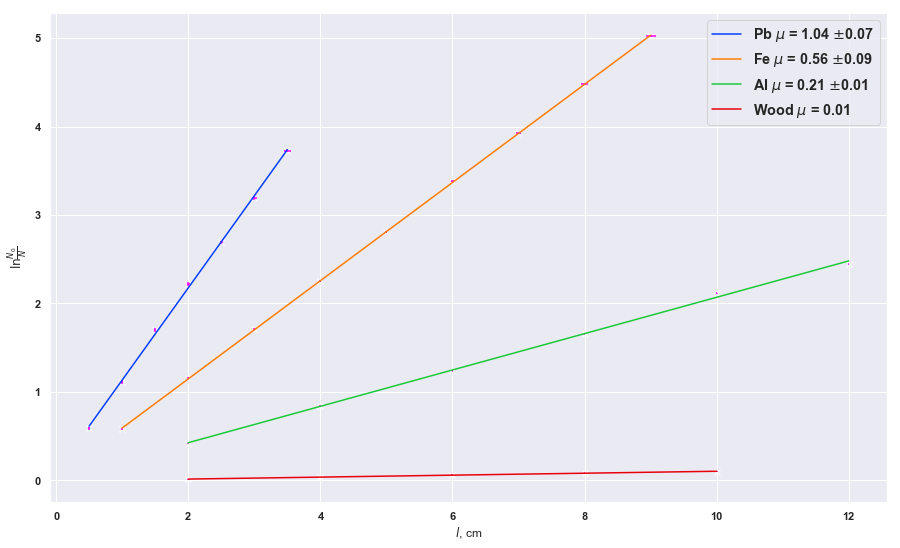

In [136]:
plt.ylabel('$\ln{\\frac{N_0}{N}}$', fontsize=12)
plt.xlabel('$l$, cm', fontsize=12)
plot(Pb, dPb, 'Pb')
plot(Fe, dFe, 'Fe')
plot(Al, dAl, 'Al')
plot(Wd, dWd, 'Wood')
plt.legend()

# Вывод:
* Измерили по данным коэффициенты ослабления потока $\gamma$−лучей и получили соответсвенно значения:



* Зная значения коэффициентов ослабления потока, можно определить по таблицам энергию $\gamma$−лучей:

| substance| $E_{\gamma}$  |
|:--------:|:-------------:|
| Pb       | 0.7 MeV       |
| Fe       | 0.7 MeV       |
| Al       | 0.6 MeV       |

* Точно нельзя сказать насколько были получены точные данные коэффициентов ослабления, но значения энергий $\gamma$−лучей получились похожие для всех образцов, из этого можно сделать вывод, что значения коэффициентов посчитаны правильно или был неправильно поставлен эксперимент.

In [188]:
n = 4
m = 9
e = 4.8
h = 6.6
eps = 1./3
Z = 26 * 4.8
m*Z**2*e**4/(n**2 * 8 * h**2 * eps**2)   / (10**(5))


1.2011058946115705

In [187]:
m * 3**2

81